# 🧠 EDA — Détection de fraudes bancaires

Exploration du dataset *Credit Card Fraud Detection* (Kaggle)  
Objectif : comprendre la structure, le déséquilibre des classes et préparer le prétraitement.


# 1. Chargement et aperçu rapide
---

In [27]:
# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du dataset
file_path = "../data/raw/creditcard.csv"
df = pd.read_csv(file_path)

# Aperçu général
print("Dimensions du dataset :", df.shape)
print("\nColonnes :\n", df.columns.tolist())
print("\nAperçu des 5 premières lignes :")
display(df.head())

# Types de données
print("\nTypes de colonnes :")
print(df.dtypes)

# Vérification rapide des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum().sort_values(ascending=False).head(10))



Dimensions du dataset : (284807, 31)

Colonnes :
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Aperçu des 5 premières lignes :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Types de colonnes :
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Valeurs manquantes par colonne :
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64


| Aspect             | Observation               | Interprétation                               |
| ------------------ | ------------------------- | -------------------------------------------- |
| Taille             | 284 807 transactions      | Dataset large, bon pour ML                   |
| Variables          | 31 features (dont 28 PCA) | Données anonymisées, prêtes à l’analyse      |
| Types              | Float64                   | Données numériques = simples à modéliser     |
| Données manquantes | Aucune                    | Dataset propre                               |
| Cible              | `Class` (0 ou 1)          | Détection de fraude = classification binaire |


# 2. Statistiques descriptives & analyse du déséquilibre 📊
---

## 🎯 Objectif

Analyser :

- la distribution de la variable cible Class (0 = normale, 1 = fraude),

- les statistiques descriptives des autres variables,

- et détecter les premières particularités du dataset (montants, dispersion, etc.).

In [28]:
# Statistiques générales du dataset
df.describe().T.head(10)


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Interprétation synthétique des statistiques descriptives

| Élément                        | Observation                                     | Interprétation                                                                                                         |
| ------------------------------ | ----------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **Taille du dataset**          | 284 807 transactions                            | Base volumineuse, adaptée au Machine Learning.                                                                         |
| **Variables V1–V28**           | Moyennes proches de 0 et écarts-types ≈ 1       | Données standardisées via PCA, prêtes pour la modélisation.                                                            |
| **Valeurs extrêmes (min/max)** | Présence de valeurs très élevées ou très basses | Indique des **outliers** et donc des transactions atypiques (souvent liées aux fraudes).                               |
| **Variable `Time`**            | 0 à 172 792 secondes (~48 h)                    | Le dataset couvre environ **2 jours de transactions**, utile pour détecter des schémas temporels (ex. pics de fraude). |
| **Variable `Amount`**          | (non encore décrite mais connue du dataset)     | Représente le **montant de chaque transaction**, à normaliser avant modélisation.                                      |
| **Variable `Class`**           | 0 = normale, 1 = fraude                         | Cible binaire, généralement très déséquilibrée.                                                                        |
| **Valeurs manquantes**         | Aucune                                          | Dataset propre et complet.                                                                                             |


Les données sont :

- numériques, propres et normalisées,

- mais contiennent des valeurs extrêmes (possibles indices de fraude),

- et nécessitent une analyse approfondie de la distribution (pour détecter le déséquilibre de classes et préparer le modèle).

In [29]:
# Distribution des classes
class_counts = df['Class'].value_counts()
print("Répartition des classes :\n", class_counts)

# Pourcentage de fraudes
fraud_rate = class_counts[1] / class_counts.sum() * 100
print(f"\nTaux de fraudes : {fraud_rate:.4f}%")


Répartition des classes :
 Class
0    284315
1       492
Name: count, dtype: int64

Taux de fraudes : 0.1727%


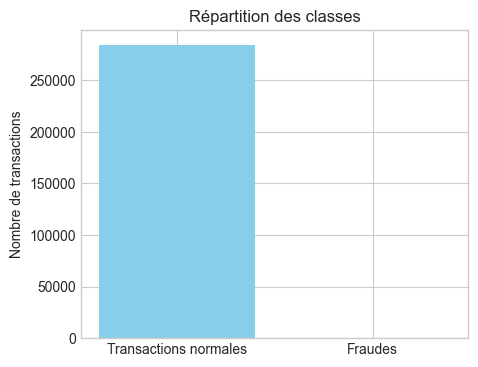

In [30]:
# Visualisation de la répartition des classes

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.bar(['Transactions normales', 'Fraudes'], class_counts, color=['skyblue', 'salmon'])
plt.title('Répartition des classes')
plt.ylabel('Nombre de transactions')
plt.show()


## Interprétation de la répartition des classes

L’analyse de la variable cible Class met en évidence un déséquilibre très prononcé entre les transactions normales et les transactions frauduleuses. Sur un total de 284 807 transactions, 284 315 (soit environ 99,83 %) sont normales, contre seulement 492 cas de fraude (0,17 %).

Le graphique de répartition illustre clairement cette disparité : la barre correspondant aux transactions normales domine largement, tandis que celle des fraudes est presque imperceptible. Ce déséquilibre extrême, typique des problèmes de détection de fraude, souligne la rareté des cas positifs et la difficulté du problème de classification.

Dans un tel contexte, un modèle naïf prédisant systématiquement la classe “0” (non frauduleuse) obtiendrait une précision très élevée sans pour autant être utile, car il échouerait à identifier les fraudes réelles. Il est donc essentiel de privilégier des métriques adaptées (comme le Recall, le F1-score ou la courbe ROC/PR) et d’appliquer des techniques de rééquilibrage des classes (suréchantillonnage, pondération, ou modèles adaptés aux données déséquilibrées).


Résumé statistique du montant des transactions :
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


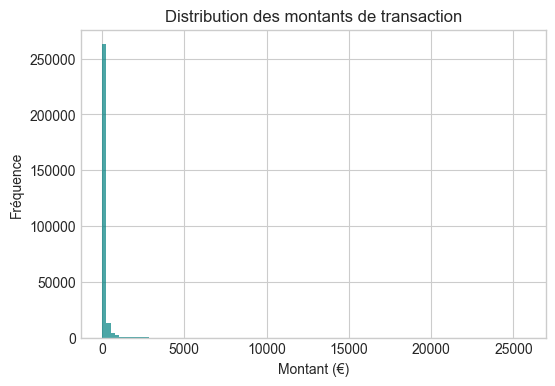

In [31]:
# Analyse statistique du montant des transactions

print("\nRésumé statistique du montant des transactions :")
print(df['Amount'].describe())

plt.figure(figsize=(6,4))
plt.hist(df['Amount'], bins=100, color='teal', alpha=0.7)
plt.title("Distribution des montants de transaction")
plt.xlabel("Montant (€)")
plt.ylabel("Fréquence")
plt.show()


## Interpretation de l'analyse de la variable Amount

L’analyse descriptive du montant des transactions (Amount) révèle une distribution fortement asymétrique. La majorité des transactions présentent des montants faibles (médiane de 22 €), tandis que quelques cas isolés atteignent jusqu’à 25 691 €. Cette concentration de valeurs autour de petits montants et la présence d’outliers importants indiquent une dispersion élevée (écart-type de 250 €).

Le graphique de distribution confirme cette observation : la quasi-totalité des transactions se situe en dessous de 500 €, avec une longue queue vers la droite représentant des montants exceptionnels. Ces extrêmes peuvent potentiellement correspondre à des transactions frauduleuses, et leur traitement (normalisation ou transformation logarithmique) sera nécessaire avant la modélisation.

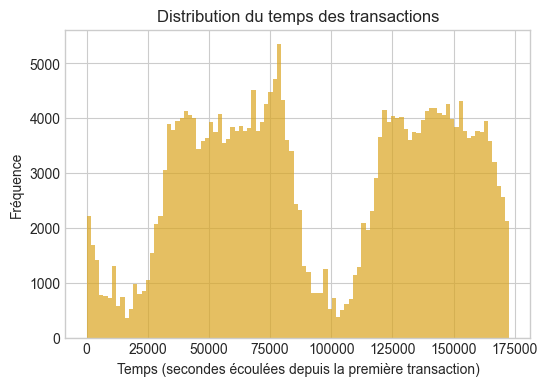

In [32]:
# Analyse statistique du temps des transactions
plt.figure(figsize=(6,4))
plt.hist(df['Time'], bins=100, color='goldenrod', alpha=0.7)
plt.title("Distribution du temps des transactions")
plt.xlabel("Temps (secondes écoulées depuis la première transaction)")
plt.ylabel("Fréquence")
plt.show()


## Interpretation de l'analyse de la variable Time

L’analyse de la variable temporelle (Time) met en évidence une répartition périodique des transactions sur environ 48 heures. Le graphique révèle deux cycles d’activité bien distincts, correspondant probablement à deux journées complètes de transactions.
Les volumes de transactions sont faibles en début et fin de période, et atteignent des pics entre 50 000 et 75 000 secondes, ainsi qu’entre 125 000 et 150 000 secondes, suggérant une activité accrue en milieu de journée.

Cette structure temporelle régulière reflète le comportement journalier des utilisateurs et constitue un indicateur pertinent pour la détection de fraudes, celles-ci pouvant être plus fréquentes lors des périodes de moindre surveillance (heures creuses).

# 3. Visualisations clés et corrélation
---

## 🎯 Objectif

Approfondir l’analyse visuelle pour :

- repérer les variables les plus corrélées à la fraude,

- visualiser les différences de distribution entre transactions normales et frauduleuses,

- explorer les composantes PCA anonymisées (V1…V28).

In [33]:
# Matrice de corrélation
corr_matrix = df.corr(numeric_only=True)

# Tri des variables les plus corrélées à la variable cible 'Class'
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print("Corrélations avec la variable 'Class':\n", corr_with_target.head(10))


Corrélations avec la variable 'Class':
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


## Interpretation de l'analyse de la corrélation avec la variable cible Class

| Variable                        | Corrélation avec `Class` | Interprétation                                                                                      |
| ------------------------------- | ------------------------ | --------------------------------------------------------------------------------------------------- |
| **V11**                         | 0.1549                   | Corrélation la plus forte avec la fraude. Les variations de `V11` semblent les plus discriminantes. |
| **V4**                          | 0.1334                   | Influence notable, potentiellement utile pour la prédiction.                                        |
| **V2**                          | 0.0913                   | Corrélation faible mais positive.                                                                   |
| **V21, V19, V20, V8, V27, V28** | entre 0.01 et 0.04       | Corrélation très faible, mais peuvent participer en combinaison avec d’autres variables.            |


- Les valeurs de corrélation sont faibles (< 0.2), ce qui est normal dans les problèmes de fraude, où les signaux sont souvent subtils et multidimensionnels.

- Aucune variable isolée ne suffit à détecter la fraude : il faudra combiner plusieurs composantes pour obtenir une bonne séparation entre les classes.

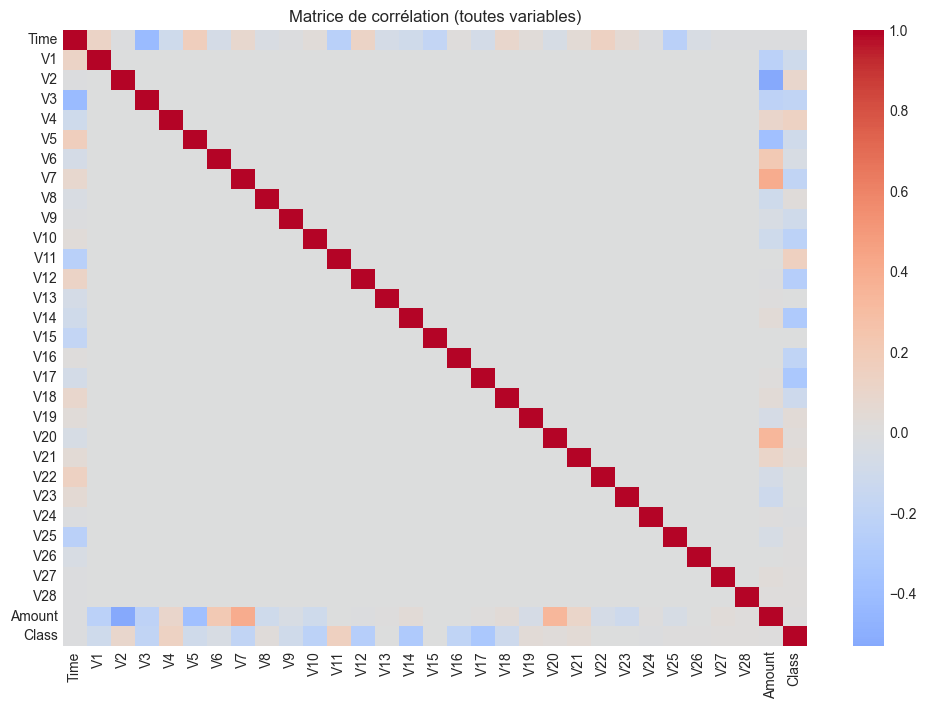

In [34]:
# Carte de chaleur de la matrice de corrélation

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (toutes variables)")
plt.show()


## Interpretation de l'analyse de la matrice de corrélation

La matrice de corrélation confirme que les variables issues de la PCA sont faiblement corrélées entre elles, garantissant l’absence de multicolinéarité.
Les corrélations avec la variable cible Class sont faibles mais non nulles (notamment pour V11, V4 et V2), suggérant que la détection de fraude repose sur des combinaisons d’effets subtils plutôt que sur des relations linéaires directes.

C:\Users\LPB LAPTOP\AppData\Local\Temp\ipykernel_22016\707214641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['skyblue', 'salmon'])


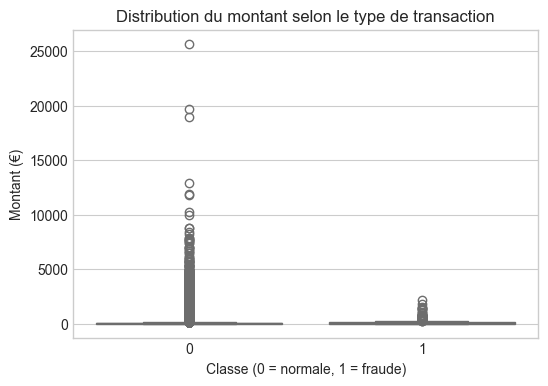

In [35]:
# Distribution du montant des transactions selon la classe

plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df, palette=['skyblue', 'salmon'])
plt.title("Distribution du montant selon le type de transaction")
plt.xlabel("Classe (0 = normale, 1 = fraude)")
plt.ylabel("Montant (€)")
plt.show()


## Interpretation : Distribution du montant selon le type de transaction

Le boxplot montre la distribution du montant (Amount) séparée selon la variable Class :

- La classe 0 (transactions normales) présente une grande variabilité avec de nombreux outliers dépassant parfois 20 000 €.

- La classe 1 (fraudes) est globalement concentrée sur des montants faibles à moyens, avec quelques valeurs isolées autour de 2 000–5 000 €, mais sans atteindre les montants extrêmes des transactions normales.

Les transactions frauduleuses concernent majoritairement des montants faibles, tandis que les transactions normales couvrent toute la gamme de montants.
Cela suggère que les fraudeurs privilégient des opérations discrètes pour éviter d’être repérés.

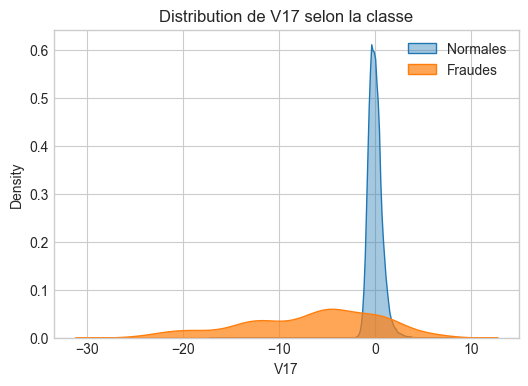

In [36]:
# Distribution de V17 selon la classe

plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df['Class']==0], x='V17', label='Normales', fill=True, alpha=0.4)
sns.kdeplot(data=df[df['Class']==1], x='V17', label='Fraudes', fill=True, alpha=0.7)
plt.title("Distribution de V17 selon la classe")
plt.legend()
plt.show()


## Interpretation : Distribution de V17 selon la classe

Le graphique de densité montre deux courbes distinctes :

- En bleu, la distribution des transactions normales (classe 0) est fortement concentrée autour de 0, avec une forme très fine et symétrique.

- En orange, la distribution des fraudes (classe 1) est plus étalée, s’étendant largement vers les valeurs négatives (jusqu’à environ -30).

Cette différence visuelle indique que la variable V17 présente des valeurs typiquement plus faibles pour les transactions frauduleuses.

L’analyse de la variable V17 selon la classe de transaction met en évidence une différence de distribution significative entre les transactions normales et frauduleuses.
Les transactions normales se concentrent autour de valeurs proches de zéro, tandis que les fraudes présentent une distribution beaucoup plus étalée et orientée vers les valeurs négatives.
Ce contraste suggère que la variable V17 est particulièrement sensible aux comportements atypiques et constitue un bon indicateur discriminant pour la détection de fraude.

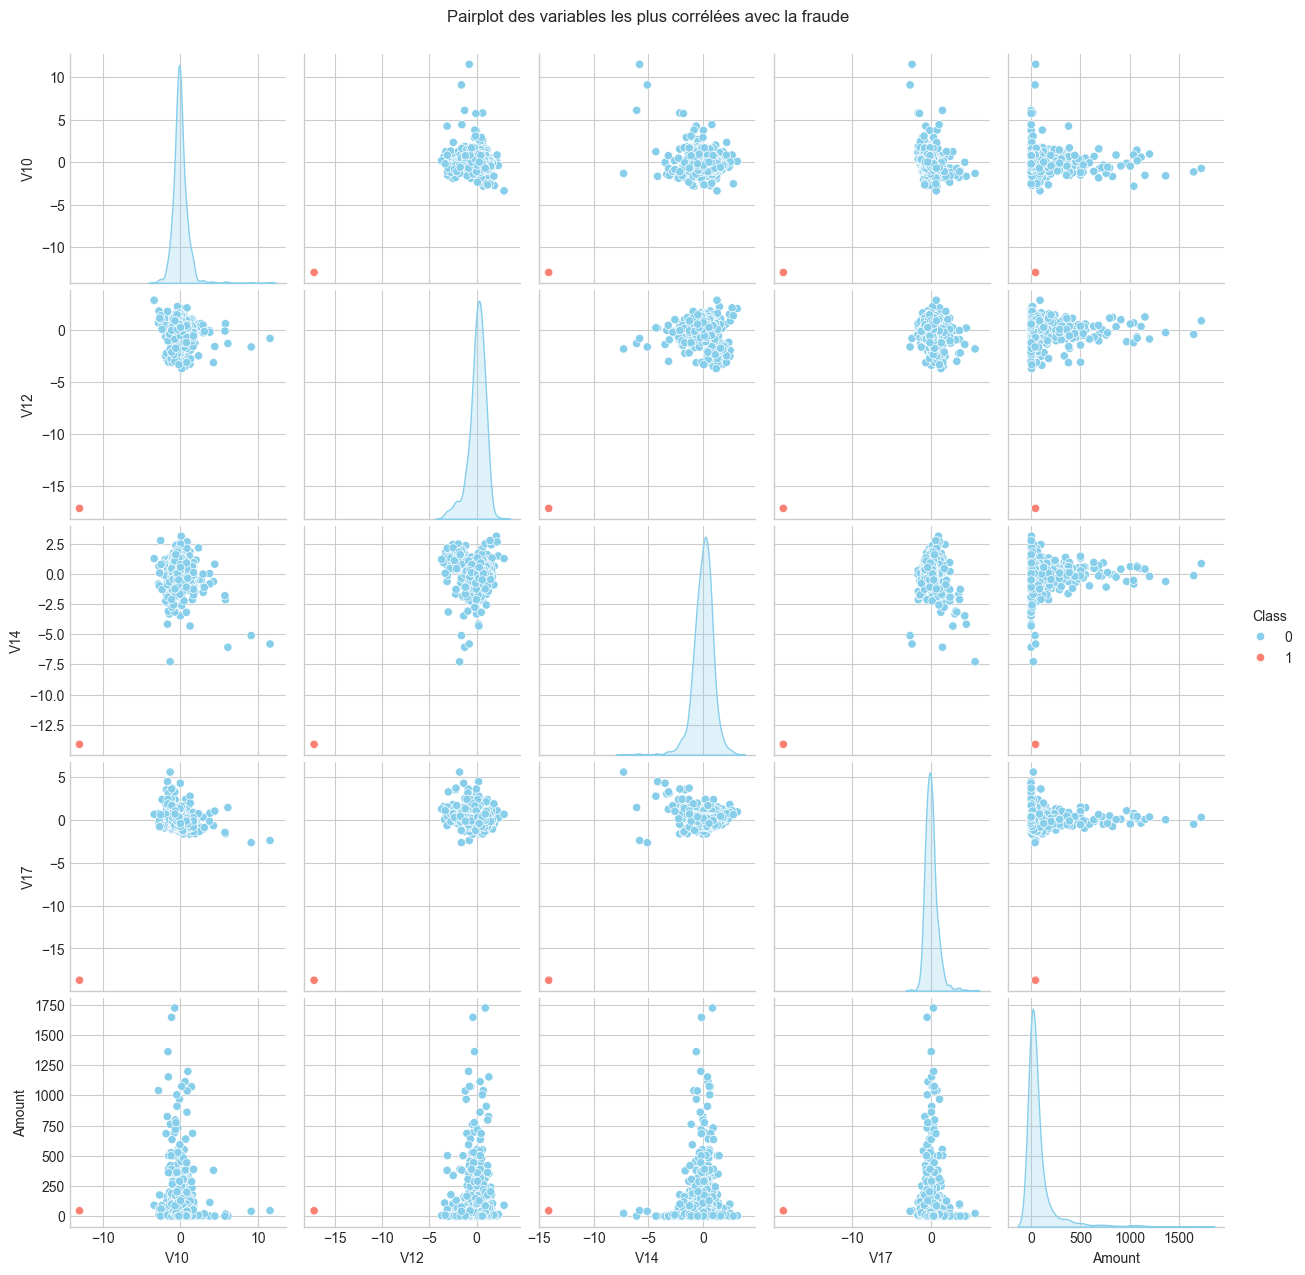

In [41]:
# Pairplot des variables les plus corrélées avec la fraude

sns.pairplot(df.sample(1000), vars=['V10', 'V12', 'V14', 'V17', 'Amount'], hue='Class', diag_kind='kde', palette=['skyblue', 'salmon'])
plt.suptitle("Pairplot des variables les plus corrélées avec la fraude", y=1.02)
plt.show()


## Analyse du pairplot des variables les plus corrélées avec la fraude

Le pairplot présente les distributions et relations croisées entre les variables les plus corrélées à la variable Class, à savoir :
- V10, V12, V14, V17 et Amount.
Les points bleus représentent les transactions normales (classe 0), tandis que les points rouges représentent les fraudes (classe 1).

### Observations principales

1. Forte concentration des transactions normales

- La majorité des points bleus se situent dans des zones compactes et concentrées autour de valeurs proches de 0, illustrant la stabilité des comportements normaux.

2. Dispersion des fraudes

- Les points rouges (fraudes) apparaissent isolés, dispersés ou situés en marge des nuages de points bleus.

- Cela confirme que les transactions frauduleuses présentent des profils atypiques, se démarquant clairement du comportement général.

3. Variables les plus discriminantes :

- V10, V12, V14, et surtout V17 montrent des écarts nets entre les fraudes et les transactions normales.

- Ces variables semblent particulièrement efficaces pour différencier les deux classes, car les fraudes se situent dans des zones où les normales sont quasi absentes.

4. Montant (Amount)

- Bien que le montant ne soit pas fortement corrélé à la fraude, il montre des fraudes dispersées sur une large gamme de valeurs, ce qui peut renforcer la prédiction lorsqu’il est combiné à d’autres variables.

L’analyse du pairplot des variables les plus corrélées à la fraude (V10, V12, V14, V17 et Amount) révèle des différences structurelles marquées entre les transactions normales et frauduleuses. Les transactions normales se regroupent dans des zones compactes, tandis que les fraudes apparaissent comme des points isolés et atypiques, souvent situés en dehors des zones de forte densité.

Ces observations confirment que la détection de fraude repose sur la combinaison de plusieurs variables, dont certaines (comme V17 et V14) se distinguent particulièrement par leur pouvoir discriminant. Ce constat justifie l’emploi de modèles de classification ou d’anomalie capables de capturer des relations non linéaires et multidimensionnelles entre les variables.

# Conclusion générale de l’analyse exploratoire
---

L’analyse exploratoire du jeu de données de transactions bancaires a permis de mieux comprendre la structure et les caractéristiques des variables avant la phase de modélisation. Le dataset, composé de 284 807 observations et 31 variables, est complet et ne contient aucune valeur manquante, ce qui en fait une base propre et exploitable. Les variables V1 à V28, issues d’une transformation en composantes principales (PCA), sont centrées et réduites, garantissant l’absence de corrélation forte entre elles.

La variable cible Class révèle un déséquilibre extrême : seules 0,17 % des transactions sont frauduleuses. Ce déséquilibre, confirmé visuellement, souligne la nécessité d’utiliser des techniques adaptées à l’apprentissage sur données déséquilibrées, ainsi que des métriques d’évaluation spécifiques telles que le Recall, le F1-score ou l’AUC-PR.

L’analyse univariée montre que la majorité des transactions portent sur de petits montants (médiane ≈ 22 €), tandis que quelques opérations atteignent des montants très élevés, souvent liés à des valeurs aberrantes. L’étude du temps met en évidence deux cycles journaliers d’activité correspondant à deux journées consécutives, suggérant une dynamique comportementale récurrente.

L’examen des corrélations indique que certaines variables, notamment V11, V4 et V2, présentent une légère corrélation positive avec la fraude, sans toutefois être suffisantes pour isoler les transactions frauduleuses à elles seules. L’analyse des distributions (par exemple, V17) et du pairplot confirme que les fraudes se distinguent par des profils atypiques, souvent éloignés du comportement moyen des transactions normales.

En somme, cette exploration met en évidence un dataset propre, bien structuré mais fortement déséquilibré, où la fraude se manifeste par des signaux faibles et multidimensionnels. Ces constats orientent la suite du travail vers une phase de modélisation supervisée, mobilisant des méthodes robustes et sensibles aux outliers, capables de capter les interactions complexes entre variables pour une détection de fraude plus précise.

